# Decidsion Tree Classification


1. Import Necessary Libraries
   

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [79]:
df= sns.load_dataset('titanic')

In [80]:
x= df[['pclass','sex', 'age', 'sibsp', 'parch', 'fare']]
y=df['survived']

In [81]:
x= pd.get_dummies(x, columns=['sex'])

In [82]:
x.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [83]:
x.age.fillna(value=x['age'].mean(), inplace=True)

In [84]:
x_train, x_test,y_train, y_test= train_test_split(x, y, train_size=0.8)

In [85]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [86]:
predictions= model.predict(x_test)

In [87]:
print('Accuracy: ' , accuracy_score(y_test ,predictions))

Accuracy:  0.770949720670391


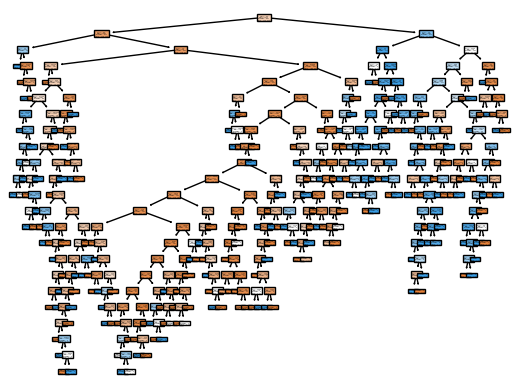

<Figure size 640x480 with 0 Axes>

In [88]:
tree.plot_tree(model.fit(x,y), filled=True)
plt.show()
plt.savefig('tree.png')

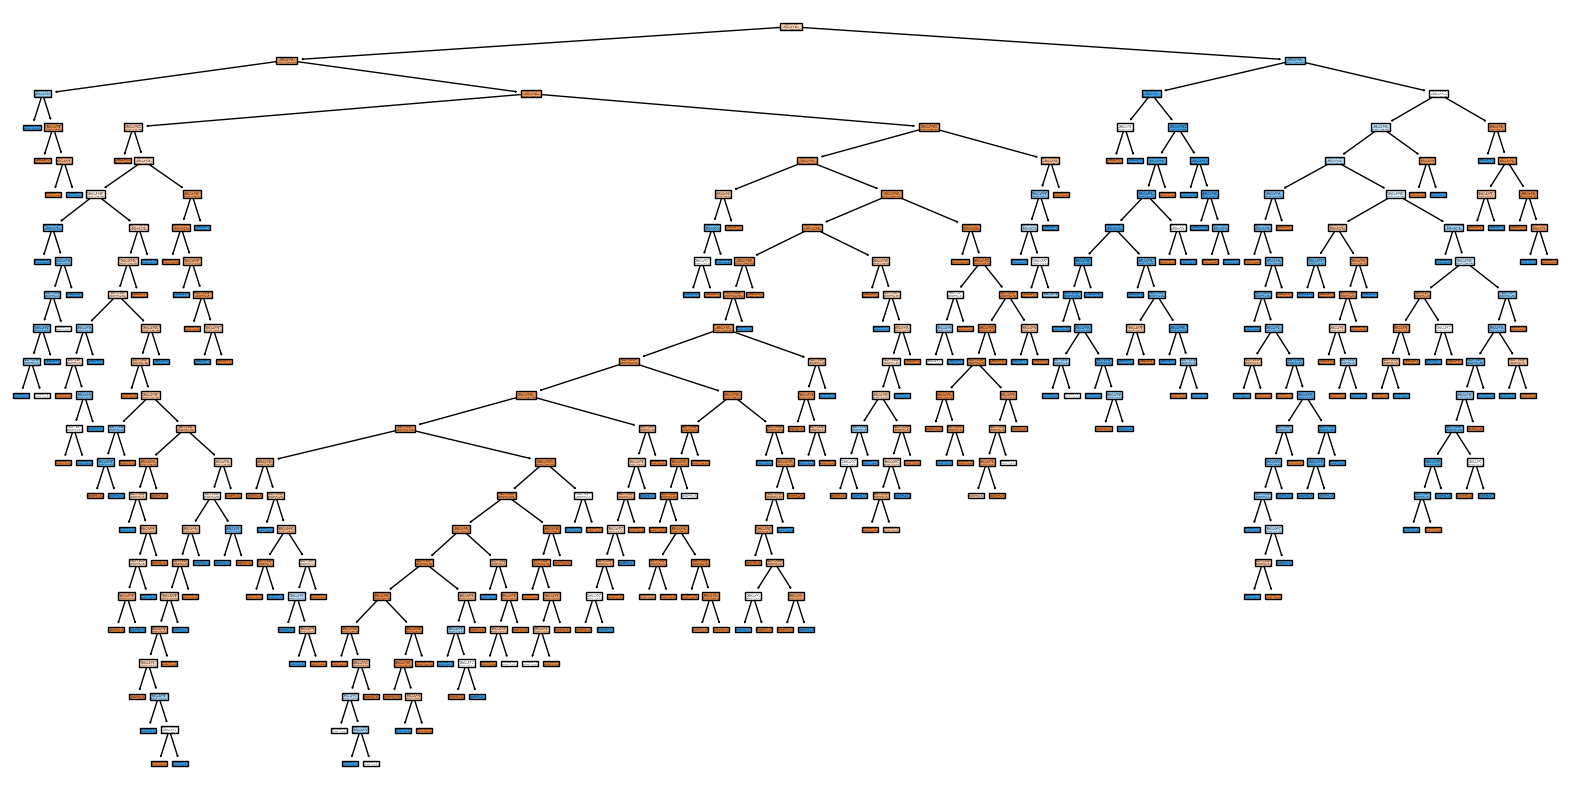

<Figure size 640x480 with 0 Axes>

In [89]:
plt.figure(figsize=(20,10))
tree.plot_tree(model.fit(x,y),filled= True)
plt.show()
plt.savefig("Decision_tree.pdf", format='pdf', dpi=300)

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
MAE=mean_absolute_error(y_true=y_test,y_pred=predictions)
MSE=mean_squared_error(y_true=y_test,y_pred=predictions)
RMSE=mean_squared_error(y_true=y_test,y_pred=predictions, squared=False)
R2=r2_score(y_true=y_test,y_pred=predictions)

print('MAE: ',MAE)
print('MSE: ',MSE)
print('RMSE: ',RMSE)
print('R2: ',R2)


MAE:  0.22905027932960895
MSE:  0.22905027932960895
RMSE:  0.478591975830779
R2:  0.0330698287220027


Precision: Precision measures the proportion of the true positive predictions among all positive predictions

In [91]:
#Precision
from sklearn.metrics import precision_score , recall_score, f1_score

precision_score(y_test, predictions)

0.7

Recall : Precision measures the proportion of the true positive predictions among all actual positive instances

In [92]:
recall_score(y_test, predictions)

0.7101449275362319

In [93]:
f1_score(y_test, predictions)

0.7050359712230215

In [94]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predictions)
cm

array([[89, 21],
       [20, 49]], dtype=int64)

Text(0.5, 23.52222222222222, 'False Label')

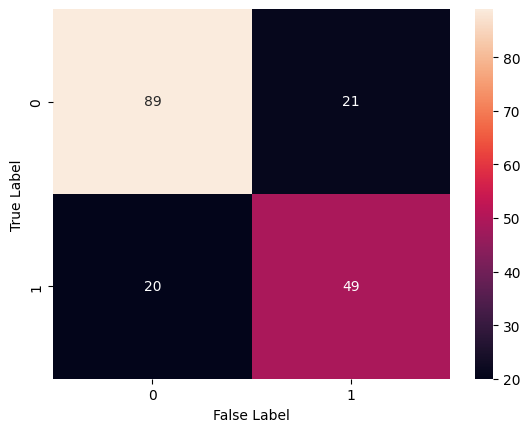

In [95]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.ylabel('True Label')
plt.xlabel('False Label')

# K Nearest Neighbour (KNN)



In [96]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
predictions =model.predict(x_test)
cm=confusion_matrix(y_test, predictions)
cm


array([[94, 16],
       [26, 43]], dtype=int64)

In [97]:
precision_score(y_test, predictions)

0.7288135593220338

In [98]:
recall_score(y_test, predictions)

0.6231884057971014

Text(0.5, 23.52222222222222, 'False Label')

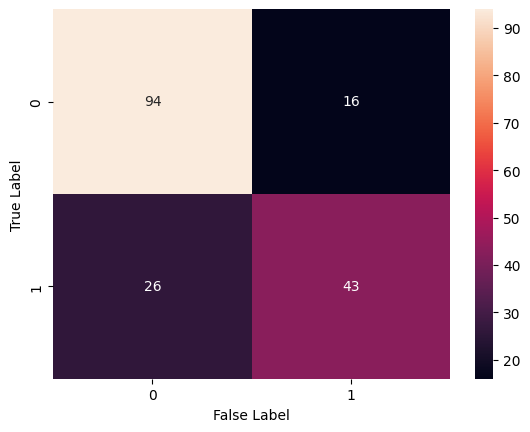

In [99]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.ylabel('True Label')
plt.xlabel('False Label')

# Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(x_train,y_train)
predictions =model.predict(x_test)
cm=confusion_matrix(y_test, predictions)
print("confusion_matrix", cm)
print("Precision", precision_score(y_test, predictions))
print("Recall_score", recall_score(y_test, predictions))
print("f1_score", f1_score(y_test, predictions))



confusion_matrix [[96 14]
 [17 52]]
Precision 0.7878787878787878
Recall_score 0.7536231884057971
f1_score 0.7703703703703704


## Logestic Regression


In [101]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train,y_train)
predictions =model.predict(x_test)
cm=confusion_matrix(y_test, predictions)
print("confusion_matrix", cm)
print("Precision", precision_score(y_test, predictions))
print("Recall_score", recall_score(y_test, predictions))
print("f1_score", f1_score(y_test, predictions))


confusion_matrix [[94 16]
 [21 48]]
Precision 0.75
Recall_score 0.6956521739130435
f1_score 0.7218045112781954


c:\Users\abuba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM

In [102]:
from sklearn.svm import SVC
model= SVC()
model.fit(x_train,y_train)
predictions =model.predict(x_test)
cm=confusion_matrix(y_test, predictions)
print("confusion_matrix", cm)
print("Precision", precision_score(y_test, predictions))
print("Recall_score", recall_score(y_test, predictions))
print("f1_score", f1_score(y_test, predictions))

confusion_matrix [[102   8]
 [ 46  23]]
Precision 0.7419354838709677
Recall_score 0.3333333333333333
f1_score 0.46


# Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(x_train,y_train)
predictions =model.predict(x_test)
cm=confusion_matrix(y_test, predictions)
print("confusion_matrix", cm)
print("Precision", precision_score(y_test, predictions))
print("Recall_score", recall_score(y_test, predictions))
print("f1_score", f1_score(y_test, predictions))

confusion_matrix [[94 16]
 [22 47]]
Precision 0.746031746031746
Recall_score 0.6811594202898551
f1_score 0.7121212121212122


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming X is your feature matrix and y is the target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose the model
models = {
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K Nearest Neighbor': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

for model_name, model in models.items():
    # Assuming you have split your data into training and testing sets
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results
    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('-' * 30)

    # Additional: Cross-validation for a more robust evaluation
    cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
    print(f'Cross-Validation Scores: {cv_scores}')
    print(f'Mean CV Accuracy: {cv_scores.mean():.4f}')
    print('-' * 30)


In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X is your feature matrix and y is the target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f'Best Hyperparameters: {best_params}')
print(f'Best Model Accuracy on Test Set: {accuracy:.4f}')


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Model Accuracy on Test Set: 0.8436
